In [88]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("/home/riccardo/Desktop/coordinates-11-02-19.txt",sep = " ")
df

,i,x,y,side,frame,field,experiment
0,0,984,7,dx,0,0,11-02-19
1,1,984,22,dx,0,0,11-02-19
2,2,981,32,dx,0,0,11-02-19
3,3,990,40,dx,0,0,11-02-19
4,4,986,55,dx,0,0,11-02-19
...,...,...,...,...,...,...,...
159995,95,719,530,sx,99,7,11-02-19
159996,96,726,529,sx,99,7,11-02-19
159997,97,729,535,sx,99,7,11-02-19
159998,98,730,541,sx,99,7,11-02-19


In [89]:
#divido fronti destri e sinistri
sdf = df[df["side"]=="sx"]
sdf = sdf.reset_index(drop = True)
ddf = df[df["side"]=="dx"]
ddf = ddf.reset_index(drop = True)

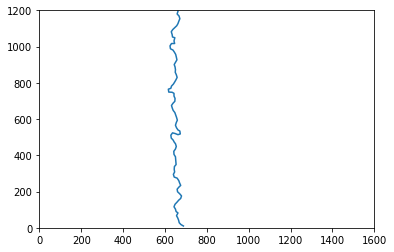

In [90]:
plt.xlim(0,1600)
plt.ylim(0,1200)
for i in range(13,14):
    plt.plot(sdf["x"][i*100:(i+1)*100],sdf["y"][i*100:(i+1)*100])

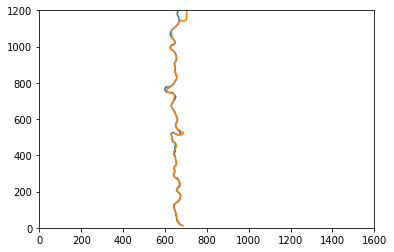

In [91]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
for i in range(11,13):
    #plt.hist(ndf["x"][i*100:(i+1)*100] + ndf["y"][i*100:(i+1)*100] ,alpha = 0.5)
    plt.plot(sdf["x"][i*100:(i+1)*100],sdf["y"][i*100:(i+1)*100])

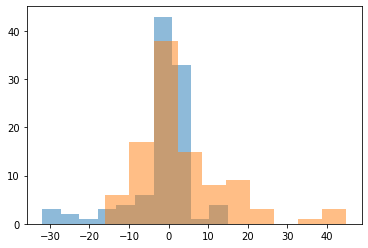

In [92]:
#vedo la distribuzione delle differenze tra le coordinate x dei frame
msd = pd.DataFrame()
for i in range(11,13):
    next_frame = sdf["x"][i*100:(i+1)*100].reset_index(inplace=False)
    previous_frame = sdf["x"][(i-1)*100:(i)*100].reset_index(inplace=False)
    msd =  next_frame - previous_frame    
    plt.hist(msd["x"],alpha = 0.5)

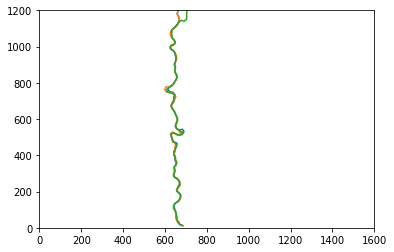

In [93]:
#tolgo il frame anomalo in base alla media delle differenze tra le coordinate del frame corrente e di quello 
#precedente


msd = pd.DataFrame()
for i in range(0,100):
    next_frame = sdf["x"][i*100:(i+1)*100].reset_index()
    previous_frame = sdf["x"][(i-1)*100:(i)*100].reset_index()
    msd =  next_frame - previous_frame    
    #plt.hist(msd["x"],alpha = 0.5)
    if msd["x"].mean() > 5:
        togli = [j for j in range(i*100,(i+1)*100)]
        #sdf = sdf.drop(togli)
        #sdf = sdf.reset_index(drop = True)
        
plt.xlim(0,1600)
plt.ylim(0,1200)
for i in range(10,13):
    #plt.hist(ndf["x"][i*100:(i+1)*100] + ndf["y"][i*100:(i+1)*100] ,alpha = 0.5)
    plt.plot(sdf["x"][i*100:(i+1)*100],sdf["y"][i*100:(i+1)*100])


ok, ora però bisogna togliere anche quelli di destra, quindi provo a farlo direttamente dal dataframe principale

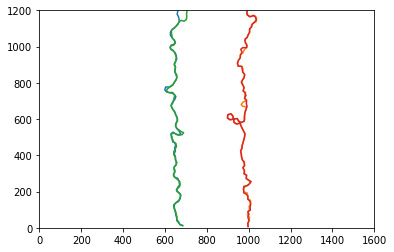

In [94]:
plt.xlim(0,1600)
plt.ylim(0,1200)

for field in range(1):
    for frame in range(11,13):
        sx = df[df["field"]== field]
        sx = sx[sx["frame"] == frame]
        sx = sx[sx["side"] == "sx"]
        dx = df[df["field"]== field]
        dx = dx[dx["frame"] == frame]
        dx = dx[dx["side"] == "dx"]

        plt.plot(sx["x"],sx["y"])
        plt.plot(dx["x"],dx["y"])

In [95]:
#df = df[df.frame != 12]
#in questo modo però tolgo il frame 12 da tutti i campi, non so se va bene però così tutti i campi avrebbero 
#lo stesso numero di frame

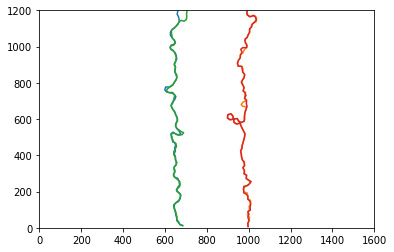

In [96]:
plt.xlim(0,1600)
plt.ylim(0,1200)

for field in range(0,1):
    for frame in range(11,13):
        sx = df[df["field"]== field]
        sx = sx[sx["frame"] == frame]
        sx = sx[sx["side"] == "sx"]
        dx = df[df["field"]== field]
        dx = dx[dx["frame"] == frame]
        dx = dx[dx["side"] == "dx"]

        plt.plot(sx["x"],sx["y"])
        plt.plot(dx["x"],dx["y"])

Aggiornamento 10 giugno: provo ad aggiungere la colonna booleana per dire se il frame è valido o no

In [97]:
df

,i,x,y,side,frame,field,experiment
0,0,984,7,dx,0,0,11-02-19
1,1,984,22,dx,0,0,11-02-19
2,2,981,32,dx,0,0,11-02-19
3,3,990,40,dx,0,0,11-02-19
4,4,986,55,dx,0,0,11-02-19
...,...,...,...,...,...,...,...
159995,95,719,530,sx,99,7,11-02-19
159996,96,726,529,sx,99,7,11-02-19
159997,97,729,535,sx,99,7,11-02-19
159998,98,730,541,sx,99,7,11-02-19


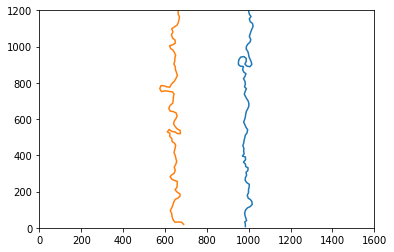

In [98]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
for i in range(2):
    #plt.hist(ndf["x"][i*100:(i+1)*100] + ndf["y"][i*100:(i+1)*100] ,alpha = 0.5)
    plt.plot(df["x"][i*100:(i+1)*100],df["y"][i*100:(i+1)*100])
    df["Normal"] = True

In [99]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("coordinates-20-11-18.txt",sep = " ")
df["Normal"] = True
df

FileNotFoundError: [Errno 2] File b'coordinates-20-11-18.txt' does not exist: b'coordinates-20-11-18.txt'

In [100]:
means = []
sqd = []
diff = pd.DataFrame()

for i in range(2,100):
    j = 1
    while df.loc[(i-2*j)*100]["Normal"] == False:
        j = j + 1
    x1 = df["x"][i*100:(i+1)*100].reset_index()
    x0 = df["x"][(i-2*j)*100:(i-1*j)*100].reset_index()
    diff =  x1 - x0    
    y1 = df["y"][i*100:(i+1)*100].reset_index()
    y0 = df["y"][(i-2*j)*100:(i-1*j)*100].reset_index()
    sd = np.sqrt((x1["x"]-x0["x"])**2 + (y1["y"]-y0["y"])**2)
    sqd.append(sd.mean())
    means.append(diff["x"].mean())
    if abs(diff["x"].mean()) > 50:
        df["Normal"][i*100:(i+1)*100] = False
        


/home/riccardo/miniconda/envs/sghe/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


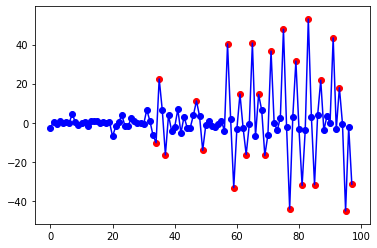

In [101]:
for i in range(len(means)):
    if abs(means[i])>10:
        c = "r"
    else: 
        c = "b"
    plt.scatter(i,means[i], c=c)

plt.plot(means,c="b")

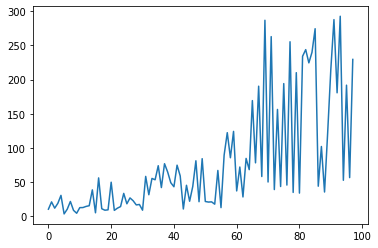

In [102]:
plt.plot(sqd)

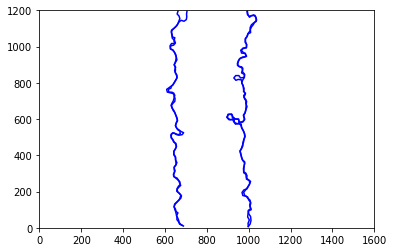

In [103]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
side = 1
for i in range(25,29):
    if df.loc[side*i*100]["Normal"] == True:
        c = "b"
    else:
        c = "r"
        
    plt.plot(df["x"][side*i*100:(side*i+1)*100],df["y"][side*i*100:(side*i+1)*100],c = c)

In [104]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("/home/riccardo/Desktop/coordinates-11-02-19.txt",sep = " ")
df["Normal"] = True
df

,i,x,y,side,frame,field,experiment,Normal
0,0,984,7,dx,0,0,11-02-19,True
1,1,984,22,dx,0,0,11-02-19,True
2,2,981,32,dx,0,0,11-02-19,True
3,3,990,40,dx,0,0,11-02-19,True
4,4,986,55,dx,0,0,11-02-19,True
...,...,...,...,...,...,...,...,...
159995,95,719,530,sx,99,7,11-02-19,True
159996,96,726,529,sx,99,7,11-02-19,True
159997,97,729,535,sx,99,7,11-02-19,True
159998,98,730,541,sx,99,7,11-02-19,True


In [105]:
means = []
sqd = []
diff = pd.DataFrame()

for i in range(2,200):
    j = 1
    while df.loc[(i-2*j)*100]["Normal"] == False:
        j = j + 1
    x1 = df["x"][i*100:(i+1)*100].reset_index()
    x0 = df["x"][(i-2*j)*100:(i-1*j)*100].reset_index()
    diff =  x1 - x0    
    y1 = df["y"][i*100:(i+1)*100].reset_index()
    y0 = df["y"][(i-2*j)*100:(i-1*j)*100].reset_index()
    sd = np.sqrt((x1["x"]-x0["x"])**2 + (y1["y"]-y0["y"])**2)
    sqd.append(sd.mean())
    means.append(diff["x"].mean())
    if abs(diff["x"].mean()) > 50:
        df["Normal"][i*100:(i+1)*100] = False
        


/home/riccardo/miniconda/envs/sghe/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


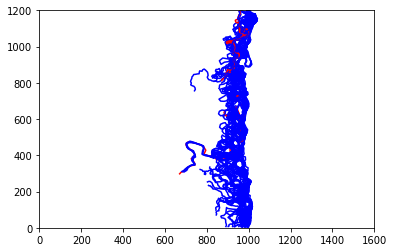

In [106]:
plt.xlim(0,1600)
plt.ylim(0,1200)

# uno dei frame anomali è il 12
side = 1
for i in range(0,200,2):
    if df.loc[side*i*100]["Normal"] == True:
        c = "b"
    else:
        c = "r"
        
    plt.plot(df["x"][side*i*100:(side*i+1)*100],df["y"][side*i*100:(side*i+1)*100],c = c)

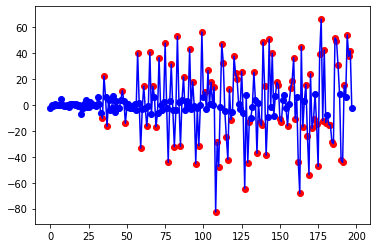

In [107]:
for i in range(len(means)):
    if abs(means[i])>10:
        c = "r"
    else: 
        c = "b"
    plt.scatter(i,means[i], c=c)

plt.plot(means,c="b")

In [240]:
import pandas as pd
import pylab as plt
import numpy as np
df = pd.read_csv("/home/riccardo/Desktop/data/coordinates-11-02-19.txt",sep = " ")
df["Normal"] = True
df

,i,x,y,side,frame,field,experiment,Normal
0,0,1061,7,dx,0,0,20-11-18,True
1,1,1067,16,dx,0,0,20-11-18,True
2,2,1074,23,dx,0,0,20-11-18,True
3,3,1086,29,dx,0,0,20-11-18,True
4,4,1095,36,dx,0,0,20-11-18,True
...,...,...,...,...,...,...,...,...
140395,95,367,1148,sx,2,7,20-11-18,True
140396,96,374,1161,sx,2,7,20-11-18,True
140397,97,383,1173,sx,2,7,20-11-18,True
140398,98,392,1184,sx,2,7,20-11-18,True


In [241]:

for field in range(1):
    for frame in range(100):
        sxx = df[df["field"]== field]
        sxx = sxx[sxx["frame"] == frame]
        sxx = sxx[sxx["side"] == "sx"]
        dx = df[df["field"]== field]
        dx = dx[dx["frame"] == frame]
        dx = dx[dx["side"] == "dx"]
sxx

,i,x,y,side,frame,field,experiment,Normal
19900,0,854,22,sx,99,0,20-11-18,True
19901,1,867,28,sx,99,0,20-11-18,True
19902,2,863,43,sx,99,0,20-11-18,True
19903,3,857,56,sx,99,0,20-11-18,True
19904,4,842,55,sx,99,0,20-11-18,True
...,...,...,...,...,...,...,...,...
19995,95,776,593,sx,99,0,20-11-18,True
19996,96,791,597,sx,99,0,20-11-18,True
19997,97,803,603,sx,99,0,20-11-18,True
19998,98,811,613,sx,99,0,20-11-18,True


In [242]:
sxx = df[df["field"] == 1]
sxx = sxx[sxx["side"] == "sx"]
sxx = sxx[["i","x","y","frame"]]
sxx

,i,x,y,frame
20100,0,563,14,0
20101,1,561,29,0
20102,2,556,43,0
20103,3,555,61,0
20104,4,546,71,0
...,...,...,...,...
39995,95,832,410,99
39996,96,840,416,99
39997,97,849,422,99
39998,98,863,425,99


In [243]:
time =sxx.pivot(index = "frame", columns = "i", values = "x")
#sxy.pivot(index = "frame",columns = "i", values = "y")
time

i,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
frame,,,,,,,,,,,,,,,,,,,,,
0,563,561,556,555,546,538,523,517,508,500,...,530,534,541,545,545,538,534,541,544,554
1,564,554,555,561,554,544,530,521,515,506,...,536,532,539,544,545,540,535,541,543,549
2,564,554,556,560,556,546,534,523,517,509,...,549,542,538,539,546,544,538,543,545,550
3,568,572,566,555,542,534,526,521,514,510,...,544,542,537,538,539,533,536,544,547,549
4,566,563,555,542,535,527,520,515,510,500,...,550,543,537,533,537,530,534,542,548,550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,631,615,599,579,562,570,577,567,553,547,...,774,788,802,818,834,831,836,844,860,862
96,632,617,626,633,634,620,600,581,571,570,...,806,816,819,835,844,852,878,885,881,897
97,652,642,619,622,649,676,667,679,705,725,...,781,804,826,833,845,872,898,875,861,878


In [244]:
diff = pd.DataFrame()
for i in range(1,100):
    diff[i] = time.loc[i] - time.loc[i-1] 

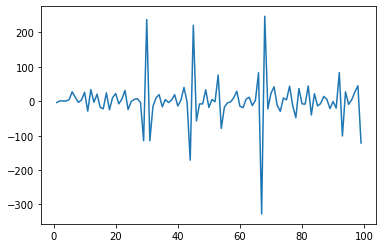

In [245]:
plt.plot(diff.mean())

KeyError: 30

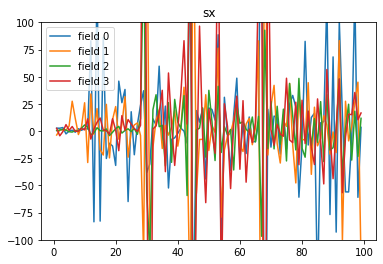

In [246]:
for field in range(5):
    for frame in range(100):
        sxx = df[df["field"]== field]
        sxx = sxx[sxx["frame"] == frame]
        sxx = sxx[sxx["side"] == "sx"]
        dx = df[df["field"]== field]
        dx = dx[dx["frame"] == frame]
        dx = dx[dx["side"] == "dx"]
    ############# lato sinistro 
    sxx = df[df["field"] == field]
    sxx = sxx[sxx["side"] == "sx"]
    sxx = sxx[["i","x","y","frame"]]
    time =sxx.pivot(index = "frame", columns = "i", values = "x")
    
    diffs = pd.DataFrame()
    for i in range(1,100):
        diffs[i] = time.loc[i] - time.loc[i-1] 
       
    plt.ylim(-100,100)
    plt.plot(diffs.mean(),label = "field " +str(field))
    plt.title("sx")
    plt.legend()


In [ ]:
 ######### lato destro
   
plt.ylim(-100,100)
for field in range(5):
    dxx = df[df["field"] == field]
    dxx = dxx[dxx["side"] == "dx"]
    dxx = dxx[["i","x","y","frame"]]
    time = dxx.pivot(index = "frame", columns = "i", values = "x")
    
    diffd = pd.DataFrame()
    for i in range(1,100):
        diffd[i] = time.loc[i] - time.loc[i-1] 
        
    plt.plot(diffd.mean(),label = "field " +str(field))
    plt.title("dx")
    plt.legend()